Saving owid-covid-data.csv to owid-covid-data.csv
✅ Cleaned global CSV saved as 'global_covid_cleaned.csv'
📊 R-squared score: 0.5729698735322386


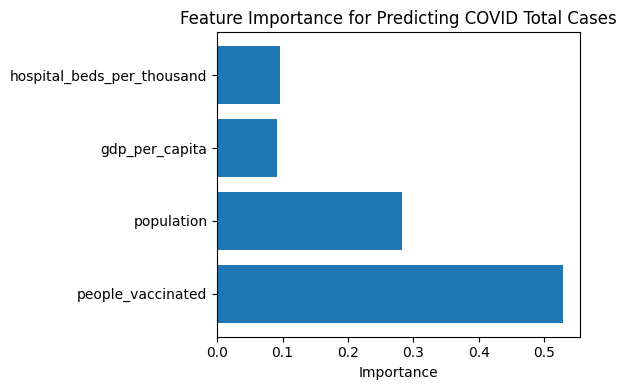

In [1]:
# ✅ STEP 1: Upload the file from your computer
from google.colab import files
uploaded = files.upload()

# ✅ STEP 2: Import the required tools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# ✅ STEP 3: Read the uploaded CSV file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# ✅ STEP 4: Keep only important columns we want to analyze
df = df[['location', 'continent', 'date', 'total_cases', 'total_deaths',
         'people_vaccinated', 'population', 'gdp_per_capita', 'hospital_beds_per_thousand']]

# ✅ STEP 5: Remove rows that have missing (empty) values
df_clean = df.dropna()

# ✅ STEP 6: Keep only the latest data for each country
df_latest = df_clean.sort_values('date').groupby('location').tail(1)

# ✅ STEP 7: Save this cleaned data to use in Tableau (Task 2)
df_latest.to_csv("global_covid_cleaned.csv", index=False)
print("✅ Cleaned global CSV saved as 'global_covid_cleaned.csv'")

# ✅ STEP 8: Prepare input (X) and target (y) for the ML model
X = df_latest[['people_vaccinated', 'population', 'gdp_per_capita', 'hospital_beds_per_thousand']]
y = df_latest['total_cases']

# ✅ STEP 9: Split into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 10: Train a Random Forest model to predict total cases
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ✅ STEP 11: Check how well the model did
y_pred = model.predict(X_test)
print("📊 R-squared score:", r2_score(y_test, y_pred))

# ✅ STEP 12: See which features are most important for prediction
importances = model.feature_importances_
features = X.columns

# ✅ STEP 13: Make a bar chart of the feature importance
plt.figure(figsize=(6, 4))
plt.barh(features, importances)
plt.title("Feature Importance for Predicting COVID Total Cases")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("global_feature_importance.png")
plt.show()


In [2]:
# STEP 14: Download the cleaned CSV file to your computer
from google.colab import files
files.download('global_covid_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>